In [1]:
#Verify we are in the lesson1 directory
%pwd

u'/home/ubuntu/catdogredux'

In [2]:
#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [132]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data'
#DATA_HOME_DIR = current_dir + '/data/sample'

In [133]:
test_path = DATA_HOME_DIR + '/test/'
results_path=DATA_HOME_DIR + '/results/'
train_path= DATA_HOME_DIR + '/train/'
valid_path = DATA_HOME_DIR + '/valid/'

In [136]:
%cd $LESSON_HOME_DIR

print (train_path)
print (valid_path)

/home/ubuntu/catdogredux
/home/ubuntu/catdogredux/data/train/
/home/ubuntu/catdogredux/data/valid/


In [6]:
# Move 2000 files from train directory to valid directory
%cd $DATA_HOME_DIR/train/cats
g = glob('*.jpg')
randomfiles = np.random.permutation(g)
for i in range(1000): 
    os.rename(randomfiles[i], DATA_HOME_DIR+'/valid/cats/' + randomfiles[i])

In [8]:
%cd $DATA_HOME_DIR/train/dogs
g = glob('*.jpg')
randomfiles = np.random.permutation(g)
for i in range(1000): 
    os.rename(randomfiles[i], DATA_HOME_DIR+'/valid/dogs/' + randomfiles[i])

/home/ubuntu/catdogredux/data/train/dogs


In [9]:
from shutil import copyfile

In [10]:
# Copy 200 files from train directory to sample/train directory, and 50 files to sample/valid directory. 
%cd $DATA_HOME_DIR/train/cats
g = glob('*.jpg')
randomfiles = np.random.permutation(g)
for i in range(100): 
    copyfile(randomfiles[i], DATA_HOME_DIR+'/sample/train/cats/' + randomfiles[i])

/home/ubuntu/catdogredux/data/train/cats


In [11]:
%cd $DATA_HOME_DIR/train/dogs
g = glob('*.jpg')
randomfiles = np.random.permutation(g)
for i in range(100): 
    copyfile(randomfiles[i], DATA_HOME_DIR+'/sample/train/dogs/' + randomfiles[i])  

/home/ubuntu/catdogredux/data/train/dogs


In [112]:
%cd $LESSON_HOME_DIR/data/valid/cats
g = glob('*.jpg')
randomfiles = np.random.permutation(g)
for i in range(25): 
    copyfile(randomfiles[i], DATA_HOME_DIR+'/valid/cats/' + randomfiles[i])

/home/ubuntu/catdogredux/data/valid/cats


In [113]:
%cd $LESSON_HOME_DIR/data/valid/dogs
g = glob('*.jpg')
randomfiles = np.random.permutation(g)
for i in range(25): 
    copyfile(randomfiles[i], DATA_HOME_DIR+'/valid/dogs/' + randomfiles[i])  

/home/ubuntu/catdogredux/data/valid/dogs


In [114]:
%cd $LESSON_HOME_DIR

%pwd

/home/ubuntu/catdogredux


u'/home/ubuntu/catdogredux'

In [137]:


# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16
#import Vgg16 helper class
vgg = Vgg16()

In [138]:
import utils; reload(utils)
from utils import plots

In [143]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=3

In [142]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [144]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
print ("test")
for epoch in range(no_of_epochs):
    print ("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print ("Completed %s fit operations" % no_of_epochs)

test
Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 588s - loss: 0.3473 - acc: 0.9700 - val_loss: 0.2438 - val_acc: 0.9825
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 588s - loss: 0.3217 - acc: 0.9762 - val_loss: 0.3037 - val_acc: 0.9790
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 588s - loss: 0.3172 - acc: 0.9774 - val_loss: 0.2501 - val_acc: 0.9825
Completed 3 fit operations


## Validate Predictions

In [145]:
#vgg.model.load_weights(results_path+latest_weights_filename)
vgg.model.load_weights(results_path+'ft2.h5')

In [118]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [119]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [120]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
n_view = 4

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

In [94]:
plot_confusion_matrix(cm, val_batches.class_indices)

NameError: name 'plot_confusion_matrix' is not defined

Found 48 correct labels


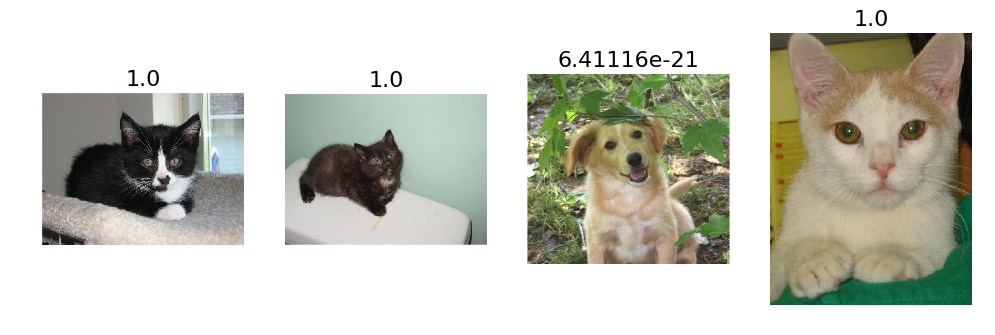

In [125]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print ("Found %d correct labels" % len(correct))
idx = np.random.permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 2 incorrect labels


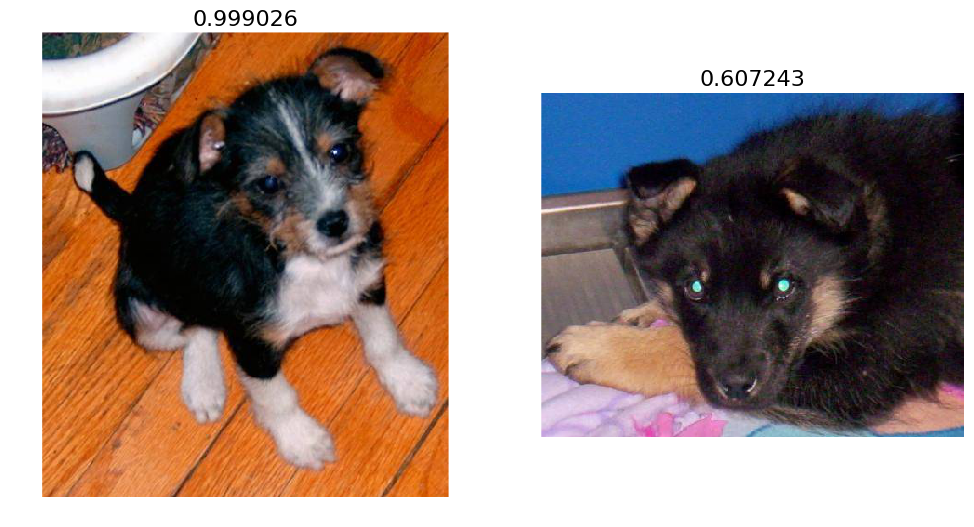

In [126]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))
idx = np.random.permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 25 confident correct cats labels


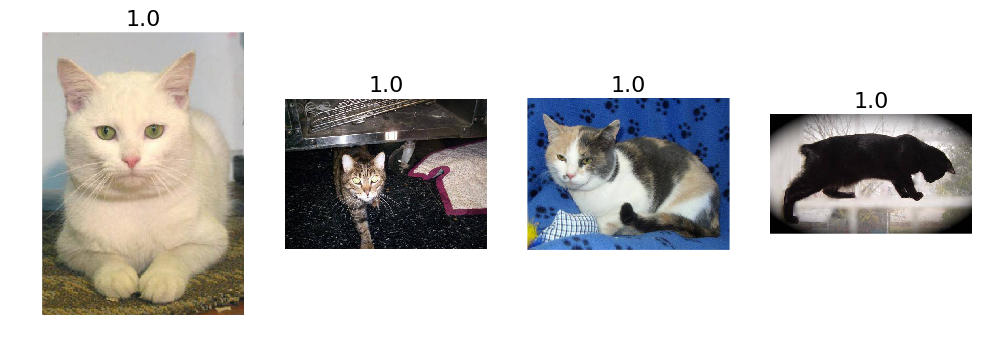

In [127]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print ("Found %d confident correct cats labels" % len(correct_cats))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 23 confident correct dogs labels


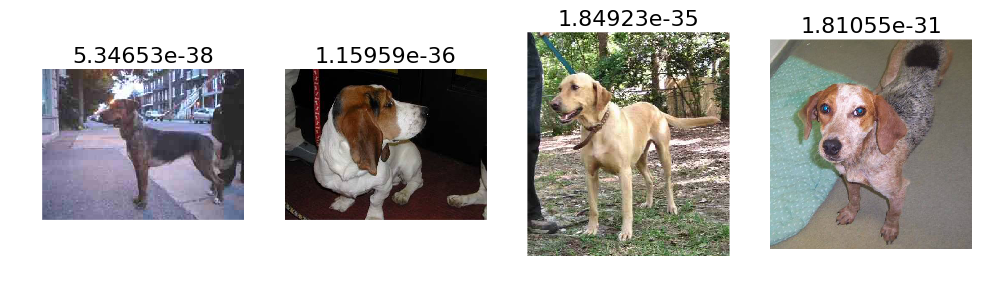

In [128]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print ("Found %d confident correct dogs labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

Found 2 incorrect cats


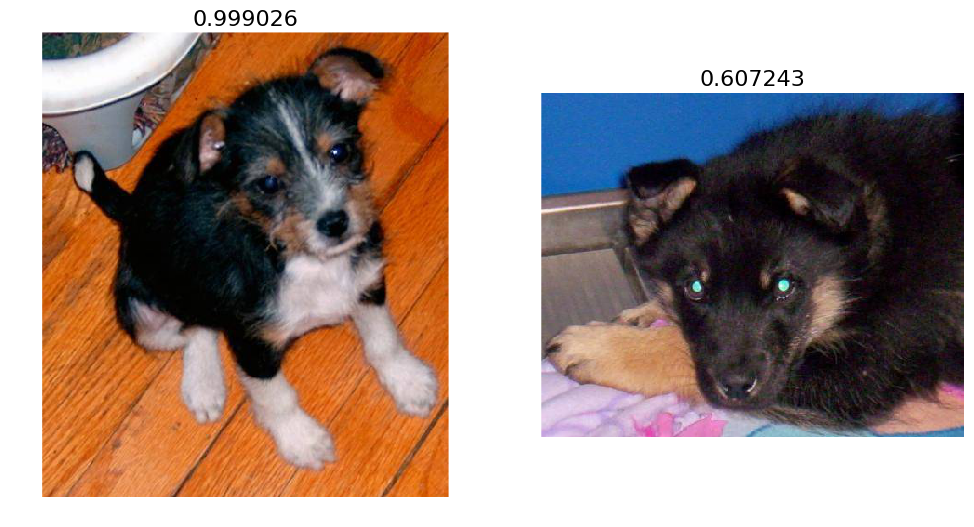

In [129]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect cats" % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

In [130]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect dogs" % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

Found 0 incorrect dogs


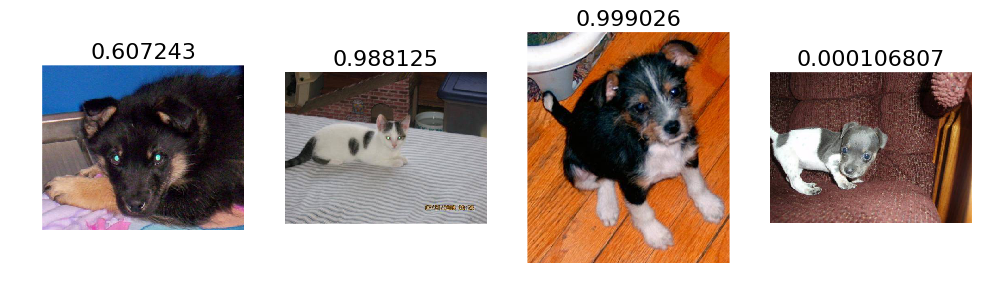

In [131]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [123]:
import itertools
from itertools import chain

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[25  0]
 [ 2 23]]


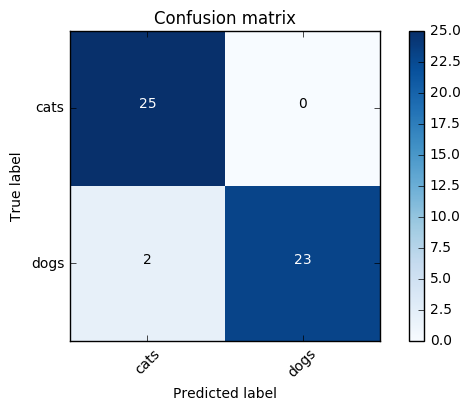

In [124]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Run the test

In [146]:
#vgg.model.load_weights(results_path+latest_weights_filename)
vgg.model.load_weights(results_path+'ft2.h5')

In [147]:
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [149]:
print (preds[:5])

filenames = batches.filenames
print (filenames[:5])

[[  1.0000e+00   0.0000e+00]
 [  1.0000e+00   1.1965e-25]
 [  1.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  0.0000e+00   1.0000e+00]]
['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']


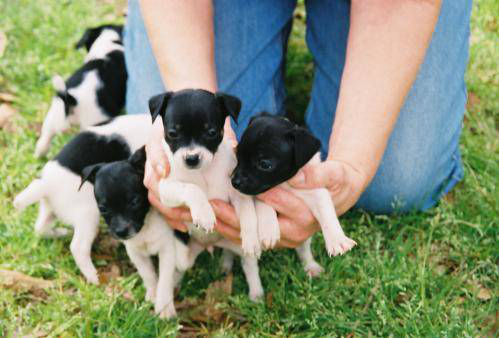

In [151]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[4])

In [154]:
#Save our test results arrays so we can use them again later
import bcolz
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()
    
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [158]:
#Grab the dog prediction column
isdog = preds[:,1]
print ("Raw Predictions: " + str(isdog[:5]))
print ("Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)]))
print ("Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)]))

Raw Predictions: [  0.0000e+00   1.1965e-25   0.0000e+00   0.0000e+00   1.0000e+00]
Mid Predictions: [ 0.5211  0.404 ]
Edge Predictions: [ 0.  0.  0. ...,  0.  0.  1.]


In [159]:
isdog = isdog.clip(min=0.025, max=0.975)

In [160]:
print ("Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)]))

Edge Predictions: []


In [161]:
print ("Raw Predictions: " + str(isdog[:5]))
print ("Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)]))

Raw Predictions: [ 0.025  0.025  0.025  0.025  0.975]
Mid Predictions: [ 0.5211  0.404 ]


In [162]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [163]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   2.5000e-02],
       [  1.2026e+04,   2.5000e-02],
       [  9.6880e+03,   2.5000e-02],
       [  4.3920e+03,   2.5000e-02],
       [  7.7900e+02,   9.7500e-01]])

In [164]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/catdogredux/data


In [165]:
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/'+submission_file_name)

/home/ubuntu/catdogredux


/home/ubuntu/catdogredux/data/submission1.csv